In [3]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [4]:
df = pd.read_csv('Data/processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [73]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

In [74]:
from sklearn.decomposition import PCA

### Your code is here

pca2 = PCA(n_components=2)

X_pca2 = pd.DataFrame(pca2.fit_transform(X_centered), columns=['pca1', 'pca2'])
X_pca2.head(10)

,pca1,pca2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752
5,-22.407211,8.286852
6,-14.909350,20.068933
7,-28.544880,39.977438
8,64.493891,0.085366
9,63.727092,0.286188


In [75]:
pca2.explained_variance_ratio_

# Атрибут, который показывает долю дисперсии (разброса) в данных, объясненную каждой главной компонентой. Этот атрибут позволяет понять, насколько каждая главная компонента важна для объяснения исходных данных.

# Можно использовать эту информацию для выбора количества компонент, которые следует сохранить. Например, если вы хотите сохранить 95% дисперсии, вы можете сложить значения из explained_variance_ratio_ до тех пор, пока не достигнете этого порога.

array([0.63176117, 0.21129863])

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


<Axes: >

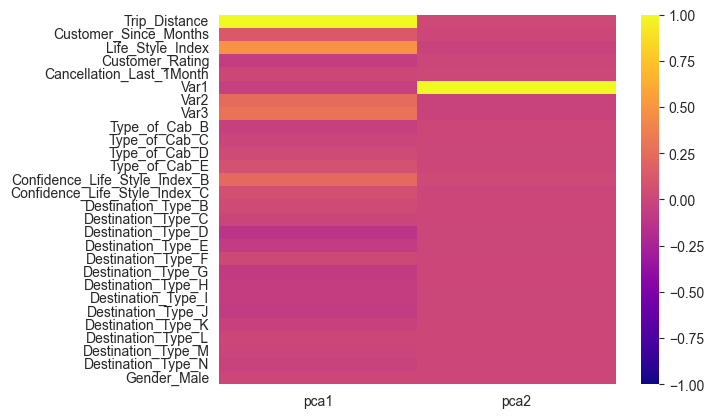

In [76]:
### Your code is here


X_pca2_cor = X_pca2.apply(lambda x: X_centered.corrwith(x), axis=0)

sns.heatmap(data=X_pca2_cor,
            cmap='plasma',
            vmin=-1,
            vmax=1,
            xticklabels=X_pca2_cor.columns,
            yticklabels=X_pca2_cor.index)

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

<Axes: xlabel='pca1', ylabel='pca2'>

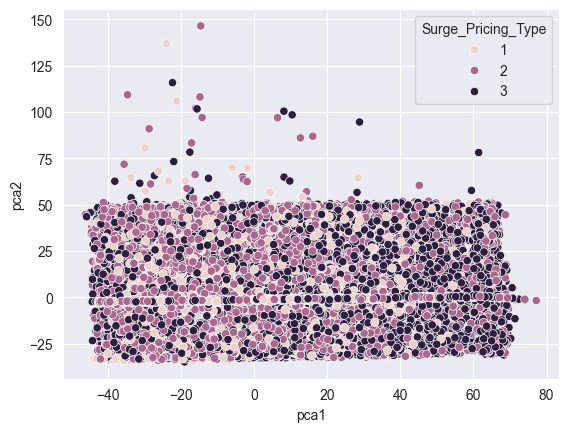

In [77]:
### Your code is here
import seaborn as sns

sns.scatterplot(x=X_pca2.pca1, y=X_pca2.pca2, hue=y)

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [78]:
### Your code is here

pca3 = PCA(n_components=3)

X_pca3 = pd.DataFrame(pca3.fit_transform(X_centered), columns=['pca1', 'pca2', 'pca3'])
X_pca3

,pca1,pca2,pca3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032
3,17.178458,-0.907657,-3.191676
4,14.477389,-11.656752,22.999348
...,...,...,...
131657,-32.267779,-2.482906,3.955203
131658,32.621206,-0.886322,11.438623
131659,-4.045367,-1.565545,-0.451941
131660,3.696395,-15.487904,3.655981


In [79]:
pca3.explained_variance_ratio_

array([0.63176117, 0.21129863, 0.13025786])

In [80]:
X_pca3_cor = X_pca3.apply(lambda x: X_centered.corrwith(x), axis=0)
X_pca3_cor

,pca1,pca2,pca3
Trip_Distance,0.997767,0.018410,-0.064176
Customer_Since_Months,0.121591,0.003500,0.081370
Life_Style_Index,0.480658,-0.025901,0.166688
Customer_Rating,-0.070104,-0.003757,-0.236793
Cancellation_Last_1Month,0.000803,0.008960,0.136222
Var1,-0.048532,0.998600,0.021003
Var2,0.247178,-0.028448,0.705159
Var3,0.293819,-0.026583,0.951081
Type_of_Cab_B,-0.048751,0.005723,0.011211
Type_of_Cab_C,-0.012059,-0.003397,-0.008707


In [81]:
X_pca3_inside = pd.DataFrame()
for i in range(len(X_pca3.columns) - 1):
    for j in range(i + 1, len(X_pca3.columns)):
        X_pca3_inside[f'{X_pca3.columns[i]}_{X_pca3.columns[j]}'] = [X_pca3.iloc[:, i].corr(X_pca3.iloc[:, j])]

<Axes: >

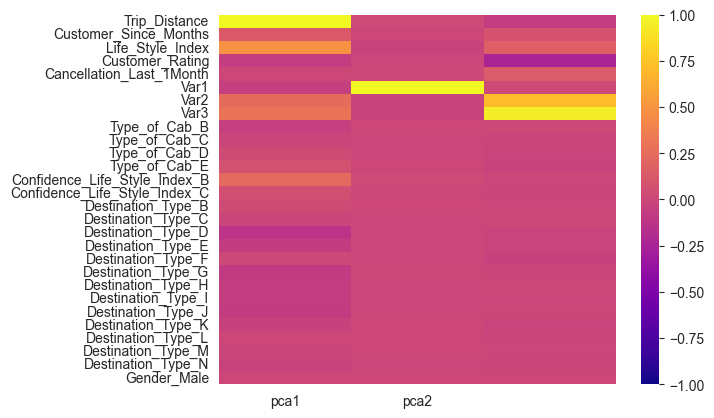

In [82]:
sns.heatmap(data=X_pca3_cor,
            cmap='plasma',
            vmin=-1,
            vmax=1,
            xticklabels=X_pca2_cor.columns,
            yticklabels=X_pca2_cor.index)

In [83]:
X_pca3_inside

,pca1_pca2,pca1_pca3,pca2_pca3
0,-8.470506e-17,-2.274813e-16,4.720222e-17


**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [84]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2,
                                                    shuffle=True, random_state=2022)

In [97]:
### Your code is here

param_grid = {'lr__penalty': ['l1', 'l2', 'elasticnet'],
              'lr__C': [1e-5, 0.0001, 0.001, 0.01]}

pipe1 = Pipeline([('scaler', StandardScaler()),
                  ('pca', PCA(n_components=2)),
                  ('lr', LogisticRegression())])

pipe1_gs = GridSearchCV(estimator=pipe1, param_grid=param_grid)
pipe1_gs.fit(X_train, y_train)
print(classification_report(y_test, pipe1_gs.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.479     0.692     0.566     11349
           3      0.494     0.509     0.501      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.401     0.356     26333
weighted avg      0.386     0.484     0.427     26333



In [96]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': [1e-5, 0.0001, 0.001, 0.01]}

pipe2_gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid)
pipe2_gs.fit(X_train, y_train)
print(classification_report(y_test, pipe2_gs.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.722     0.541     0.618      5372
           2      0.638     0.824     0.719     11349
           3      0.739     0.589     0.656      9612

    accuracy                          0.680     26333
   macro avg      0.700     0.651     0.664     26333
weighted avg      0.692     0.680     0.675     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [98]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()),
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga', random_state=1))])

    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}

    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)

    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'],
            report['weighted avg']['f1-score'])

In [100]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    accuracy, f1 = train_pca_i(n_components=n_components, X_train=X_train, y_train=y_train)
    accuracy_dict[n_components] = accuracy
    f1_score_dict[n_components] = f1

CPU times: total: 1min 24s
Wall time: 2min


In [101]:
f1_score_dict

{2: 0.4269265169630114,
 4: 0.4724230539303479,
 8: 0.5231713579311364,
 16: 0.5273629016033227,
 28: 0.6760757307801638}

<Axes: >

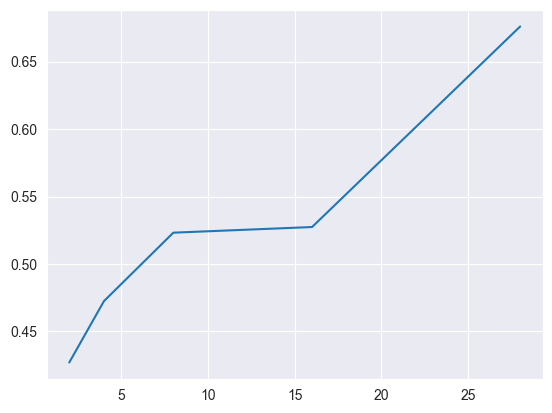

In [103]:
sns.lineplot(x=f1_score_dict.keys(), y=f1_score_dict.values())

In [102]:
accuracy_dict

{2: 0.48429726958569097,
 4: 0.5321839516955911,
 8: 0.5885770705958303,
 16: 0.5922606615273611,
 28: 0.6813883720047089}

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [107]:
from sklearn.manifold import TSNE

### Your code is here

tsne2 = TSNE(n_components=2)
X_tsne2 = pd.DataFrame(tsne2.fit_transform(X), columns=['tsne1', 'tsne2'])

<Axes: xlabel='tsne1', ylabel='tsne2'>

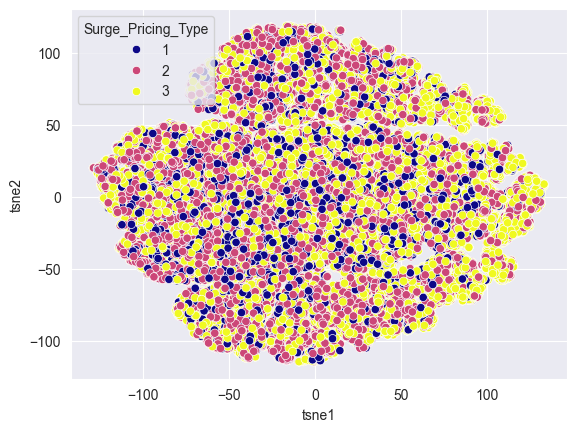

In [115]:
sns.scatterplot(x=X_tsne2.tsne1, y=X_tsne2.tsne2, hue=y, palette='plasma')

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [112]:
### Your code is here

tsne3 = TSNE(n_components=3)
X_tsne3 = pd.DataFrame(tsne3.fit_transform(X), columns=['tsne1', 'tsne2', 'tsne3'])

In [113]:
y

0         2
1         2
2         2
3         3
4         2
         ..
131657    3
131658    2
131659    2
131660    2
131661    1
Name: Surge_Pricing_Type, Length: 131662, dtype: int64

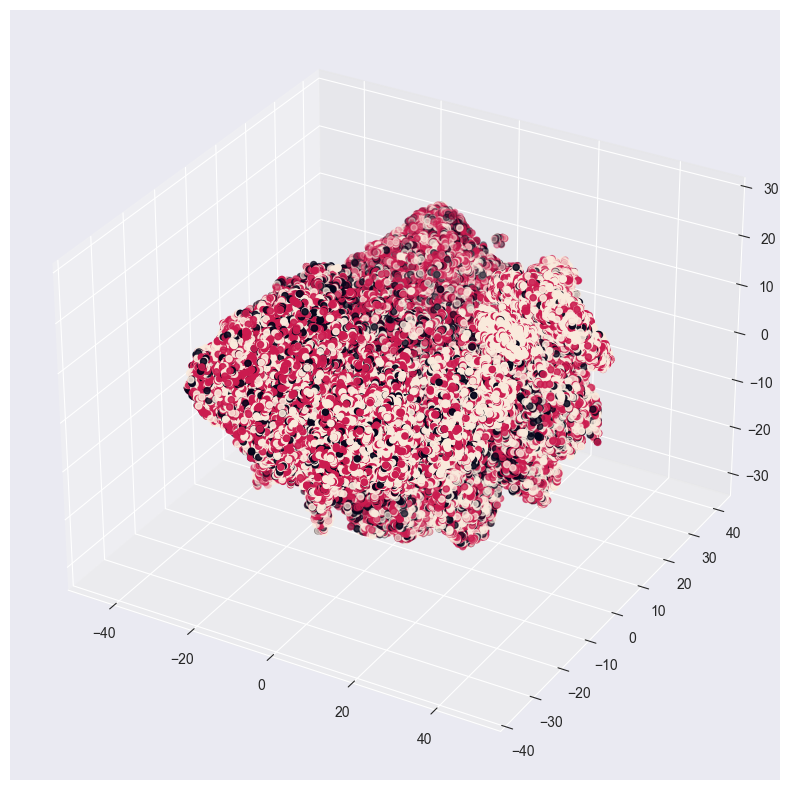

In [118]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = y.replace(['orange', 'green', 'red', 'blue'])

ax.scatter3D(X_tsne3['tsne1'], 
             X_tsne3['tsne2'],
             X_tsne3['tsne3'], 
             c=colors)

Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!